# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)

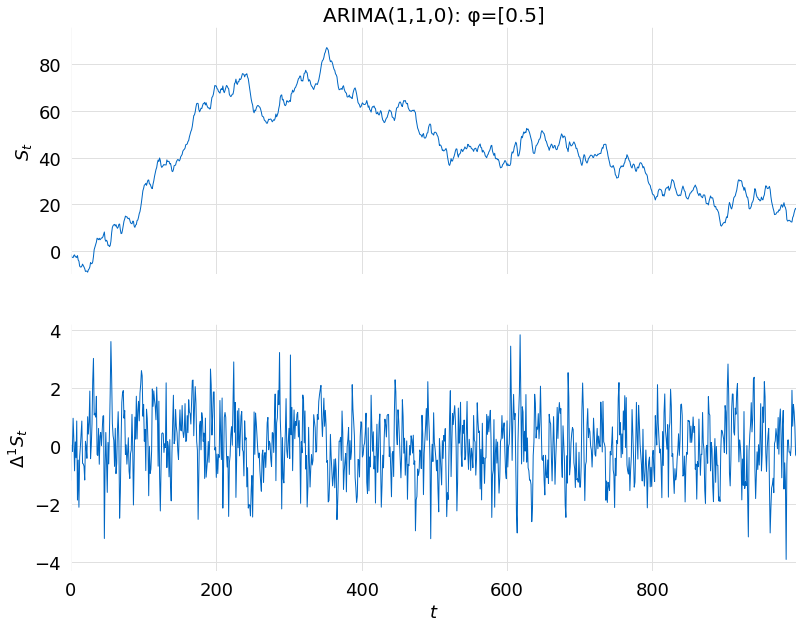

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

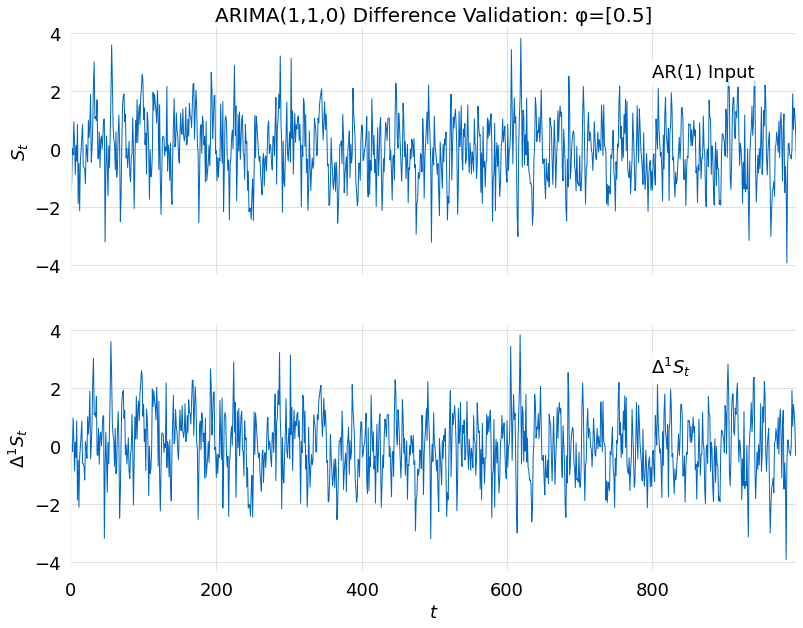

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
arima.adf_test(samples, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -0.0576755 │
├────────────────┼─────────────┤
│ pvalue         │   0.664764  │
├────────────────┼─────────────┤
│ Lags           │   7         │
├────────────────┼─────────────┤
│ Number Obs     │ 992         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [7]:
arima.adf_test(diff_1, True)

╒════════════════╤═══════════════╕
│ Test Statistic │  -8.52198     │
├────────────────┼───────────────┤
│ pvalue         │   2.10858e-14 │
├────────────────┼───────────────┤
│ Lags           │   6           │
├────────────────┼───────────────┤
│ Number Obs     │ 992           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.568   │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61655 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

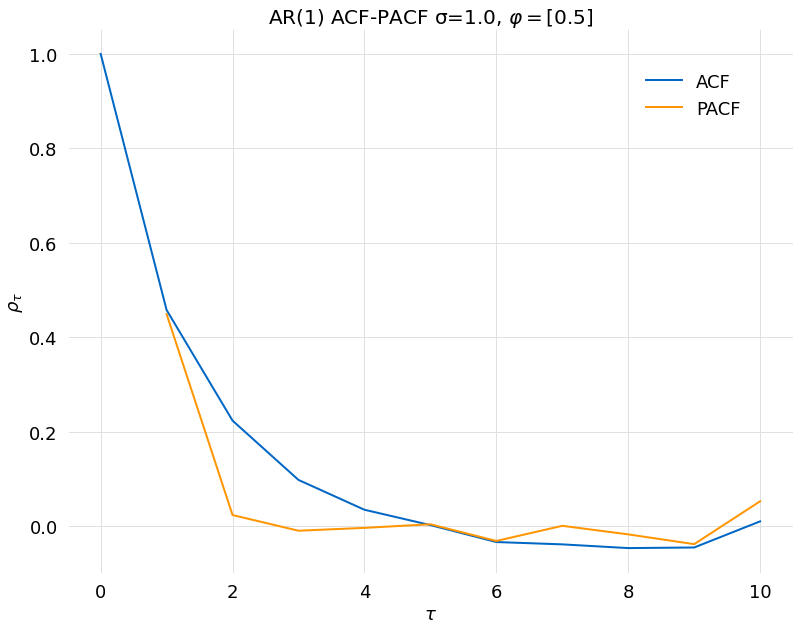

In [6]:
acf = Func.ACF.apply(diff_1, nlags=nlags)
pacf = Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [7]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1407.785
Date:                Sat, 04 Jun 2022   AIC                           2821.569
Time:                        12:09:49   BIC                           2836.289
Sample:                             0   HQIC                          2827.164
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.058      0.306      0.759      -0.096       0.131
ar.L1          0.4581      0.029     15.748      0.000       0.401       0.515
sigma2         0.9805      0.042     23.370      0.000       0.898       1.063
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.79   Prob(JB):                         0.12
Heteroskedasticity (H):               0.86   Skew:                            -0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [8]:
φ = [0.75]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

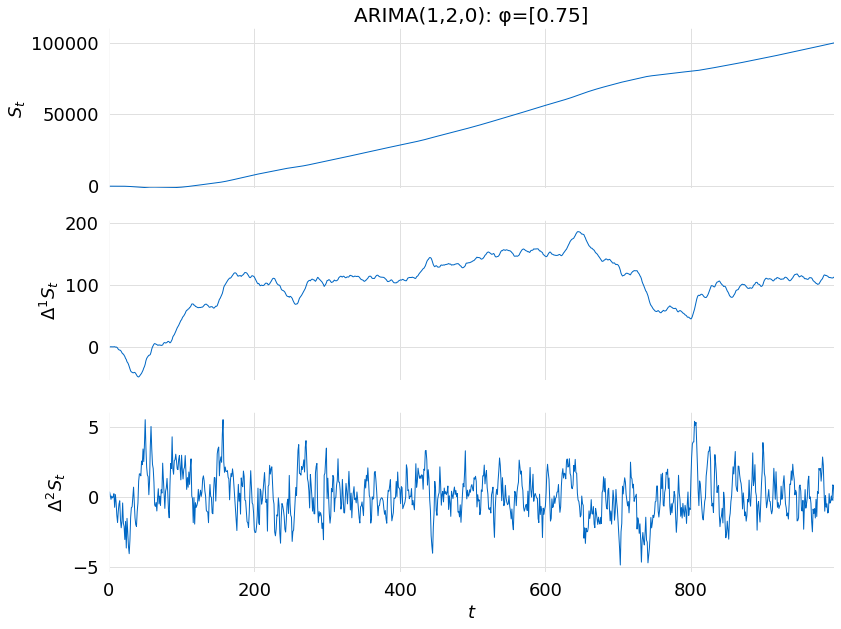

In [9]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

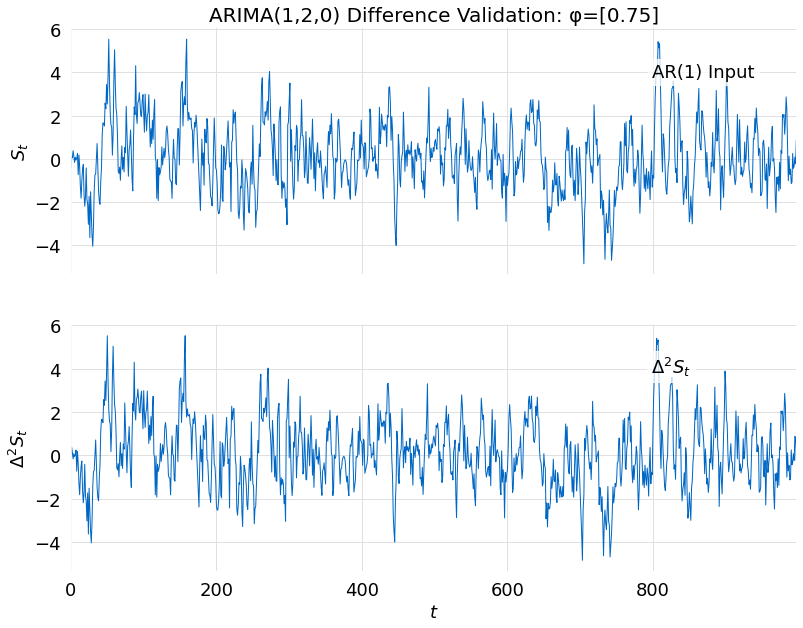

In [10]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [13]:
arima.adf_test(samples, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -2.1244    │
├────────────────┼─────────────┤
│ pvalue         │   0.0322635 │
├────────────────┼─────────────┤
│ Lags           │   4         │
├────────────────┼─────────────┤
│ Number Obs     │ 995         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

In [14]:
arima.adf_test(diff_1, True)

╒════════════════╤═════════════╕
│ Test Statistic │  -1.90375   │
├────────────────┼─────────────┤
│ pvalue         │   0.0543255 │
├────────────────┼─────────────┤
│ Lags           │   1         │
├────────────────┼─────────────┤
│ Number Obs     │ 997         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

In [15]:
arima.adf_test(diff_2, True)

╒════════════════╤══════════════╕
│ Test Statistic │ -12.0985     │
├────────────────┼──────────────┤
│ pvalue         │   4.6428e-22 │
├────────────────┼──────────────┤
│ Lags           │   2          │
├────────────────┼──────────────┤
│ Number Obs     │ 995          │
╘════════════════╧══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

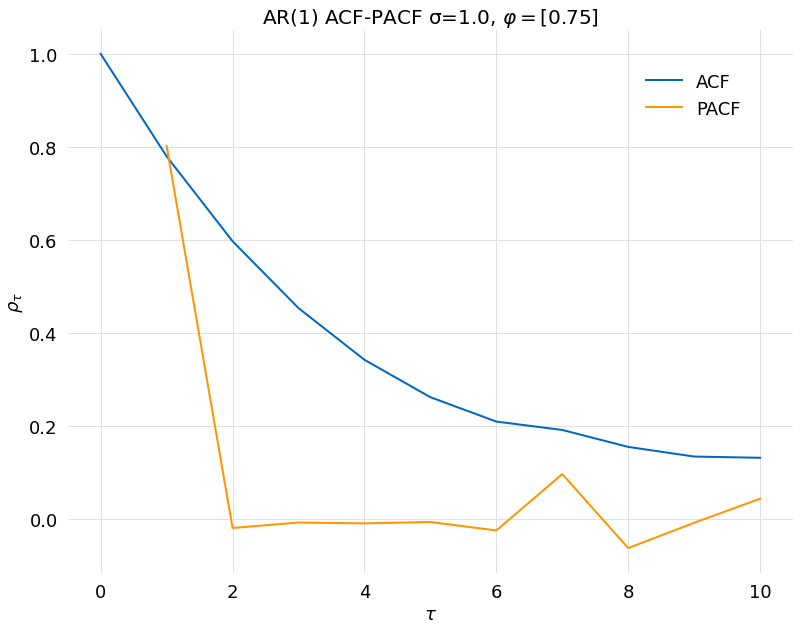

In [11]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [12]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1400.373
Date:                Sat, 04 Jun 2022   AIC                           2806.745
Time:                        12:10:13   BIC                           2821.463
Sample:                             0   HQIC                          2812.339
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.142      0.787      0.431      -0.166       0.389
ar.L1          0.7788      0.018     43.272      0.000       0.744       0.814
sigma2         0.9680      0.044     22.172      0.000       0.882       1.054
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.48   Prob(JB):                         0.15
Heteroskedasticity (H):               0.83   Skew:                             0.15
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [13]:
φ = [0.25, 0.4]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

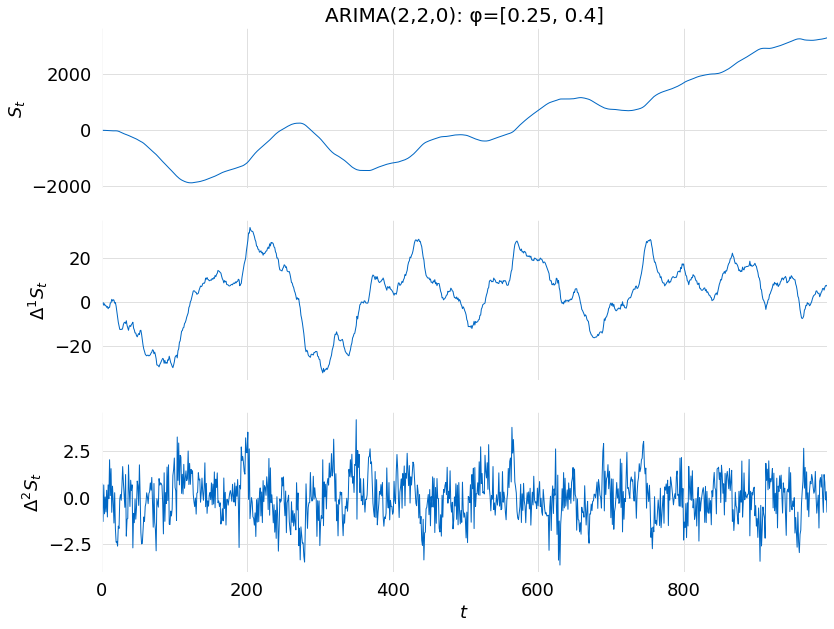

In [14]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

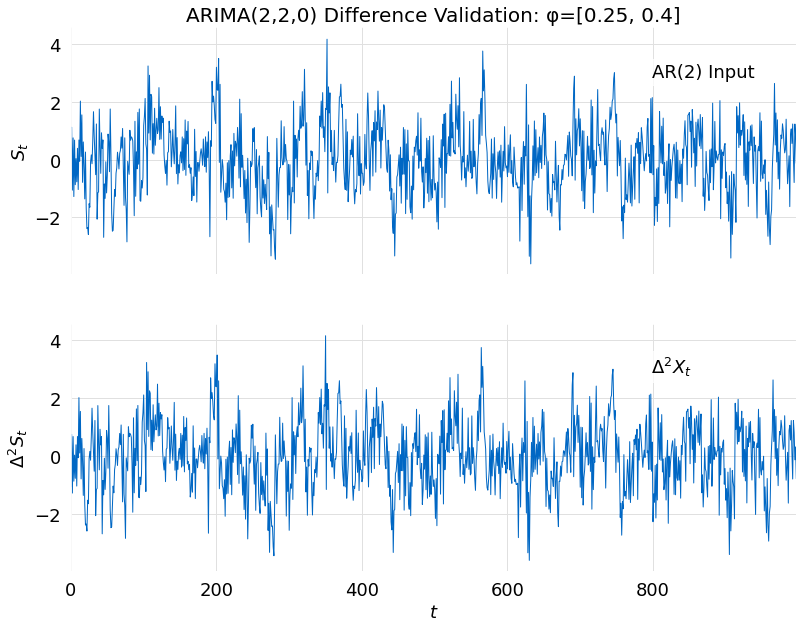

In [15]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [21]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │   0.184569 │
├────────────────┼────────────┤
│ pvalue         │   0.742219 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [22]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │   1.08974  │
├────────────────┼────────────┤
│ pvalue         │   0.927704 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [23]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -11.4832      │
├────────────────┼───────────────┤
│ pvalue         │   7.39761e-21 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

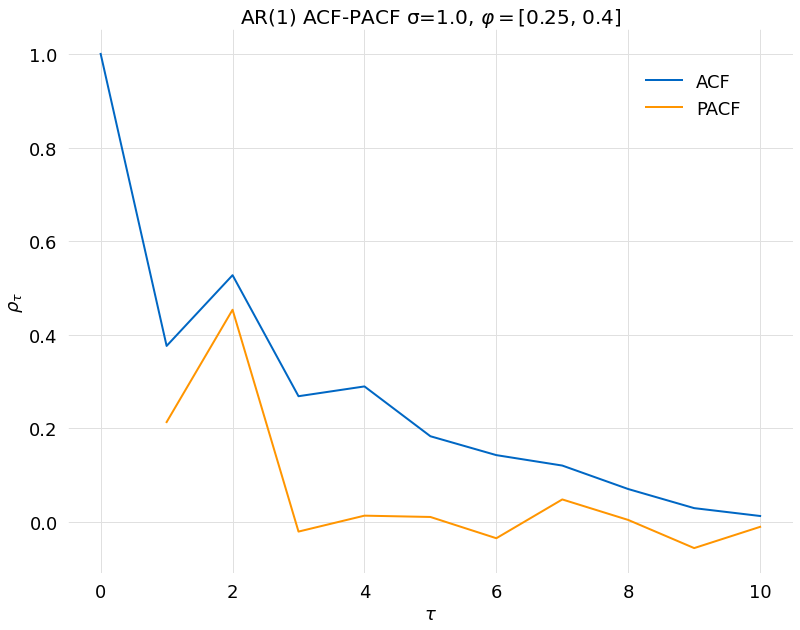

In [16]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [17]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1402.082
Date:                Sat, 04 Jun 2022   AIC                           2812.164
Time:                        12:10:45   BIC                           2831.787
Sample:                             0   HQIC                          2819.623
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.091      0.050      0.960      -0.173       0.182
ar.L1          0.2065      0.027      7.784      0.000       0.154       0.258
ar.L2          0.4492      0.027     16.350      0.000       0.395       0.503
sigma2         0.9717      0.042     23.165      0.000       0.889       1.054
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.83   Prob(JB):                         0.27
Heteroskedasticity (H):               0.89   Skew:                            -0.09
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""